In [143]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [144]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None   
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.000000,not_neg,not_int,not_lpsm,118000.000000,sb,pr,home,1U,1740.000000,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.000000,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.000000,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.200000,595.000000,360.000000,neg_amm,not_int,not_lpsm,508000.000000,sb,pr,home,1U,9480.000000,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.681000,NaN,360.000000,not_neg,not_int,not_lpsm,658000.000000,sb,pr,home,1U,11880.000000,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.304200,0.000000,360.000000,not_neg,not_int,not_lpsm,758000.000000,sb,pr,home,1U,10440.000000,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000


Let us now see the number of variables and observations in the data.

In [146]:
df.shape

(148670, 34)

There are 148670 rows and 34 columns in the dataset

In [147]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [148]:
df['Gender'].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

Interpretation: There are cells with no Gender data and also there are also joint accounts

In [149]:
print("No. of Duplicate records: ",sum(df.duplicated()))

No. of Duplicate records:  0


**Interpretation**: Here we have no duplicate records.


In [150]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.000000,99224.500000,42917.476598,24890.000000,62057.250000,99224.500000,136391.750000,173559.000000
year,148670.000000,2019.000000,0.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
loan_amount,148670.000000,331117.743997,183909.310127,16500.000000,196500.000000,296500.000000,436500.000000,3576500.000000
rate_of_interest,112231.000000,4.045476,0.561391,0.000000,3.625000,3.990000,4.375000,8.000000
Interest_rate_spread,112031.000000,0.441656,0.513043,-3.638000,0.076000,0.390400,0.775400,3.357000
Upfront_charges,109028.000000,3224.996127,3251.121510,0.000000,581.490000,2596.450000,4812.500000,60000.000000
term,148629.000000,335.136582,58.409084,96.000000,360.000000,360.000000,360.000000,360.000000
property_value,133572.000000,497893.465696,359935.315562,8000.000000,268000.000000,418000.000000,628000.000000,16508000.000000
income,139520.000000,6957.338876,6496.586382,0.000000,3720.000000,5760.000000,8520.000000,578580.000000
Credit_Score,148670.000000,699.789103,115.875857,500.000000,599.000000,699.000000,800.000000,900.000000


In [151]:
df.describe(include="object").T

,count,unique,top,freq
loan_limit,145326,2,cf,135348
Gender,148670,4,Male,42346
approv_in_adv,147762,2,nopre,124621
loan_type,148670,3,type1,113173
loan_purpose,148536,4,p3,55934
Credit_Worthiness,148670,2,l1,142344
open_credit,148670,2,nopc,148114
business_or_commercial,148670,2,nob/c,127908
Neg_ammortization,148549,2,not_neg,133420
interest_only,148670,2,not_int,141560


Interpretation:1. we can see that in column loan_limit value count of cf is high. cf means conforming loan, it is a mortgage with terms and conditions that meet the funding criteria.Conforming loans cannot exceed a certain dollar limit, which changes from year to year.

Interpretation: 2. Majority of the loans are not pre approved. 3. Majority of loan type is type1 4. Majority of loans are not Business loans 5. Amortization is an accounting technique used to periodically lower the book value of a loan 6. Most of payments are not lumpsum payments. 7. Almost all the loans are secured by Home. 8. Almost all the loans are one unit 9. There are more people in the age of 45-54 who have took the loan 10. North Region people have taken more loan compared to any other region

In [152]:
(df.isnull().sum()/df.shape[0])*100

ID                           0.000000
year                         0.000000
loan_limit                   2.249277
Gender                       0.000000
approv_in_adv                0.610749
loan_type                    0.000000
loan_purpose                 0.090133
Credit_Worthiness            0.000000
open_credit                  0.000000
business_or_commercial       0.000000
loan_amount                  0.000000
rate_of_interest            24.509989
Interest_rate_spread        24.644515
Upfront_charges             26.664425
term                         0.027578
Neg_ammortization            0.081388
interest_only                0.000000
lump_sum_payment             0.000000
property_value              10.155378
construction_type            0.000000
occupancy_type               0.000000
Secured_by                   0.000000
total_units                  0.000000
income                       6.154571
credit_type                  0.000000
Credit_Score                 0.000000
co-applicant

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### **Univariate Analysis**

The univariate analysis focuses on a single variable in the data. The main purpose of this type of analysis is to understand each variable in the data using various statistical and visualization techniques. It helps to study the pattern in each variable. The univariate analysis contains various techniques for numerical as well as a categorical variable.

### **1.) Distribution of Numerical Variables**

<Figure size 1080x576 with 0 Axes>

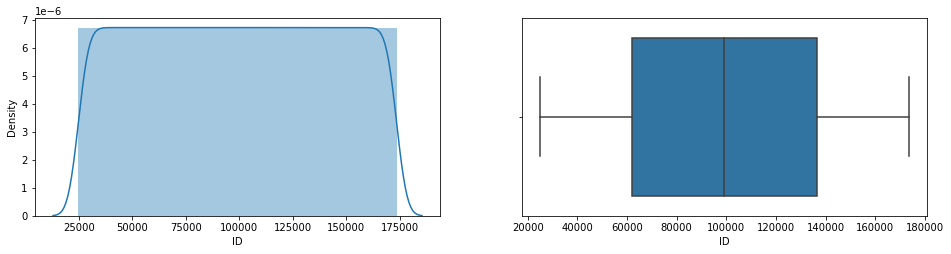

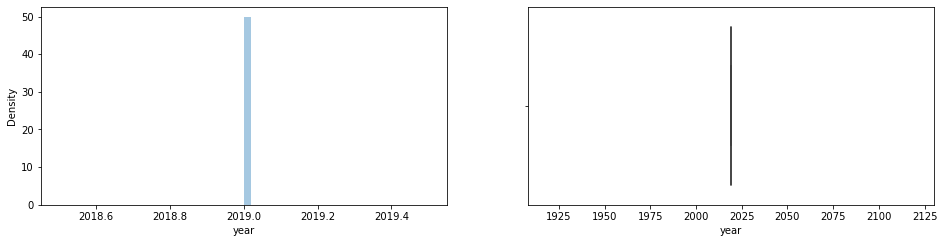

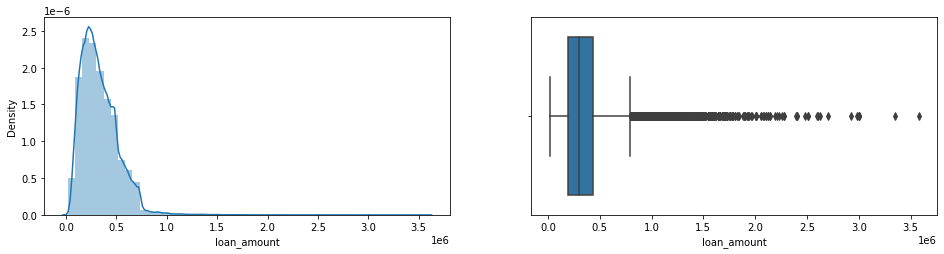

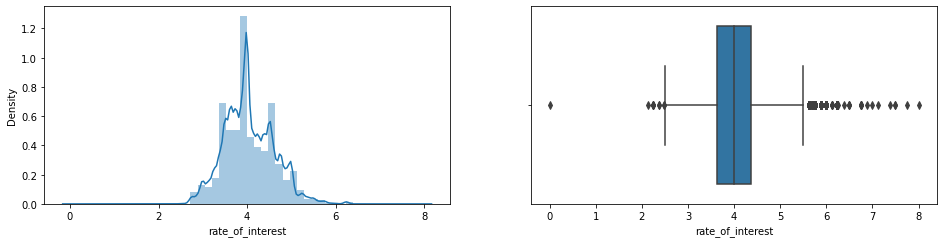

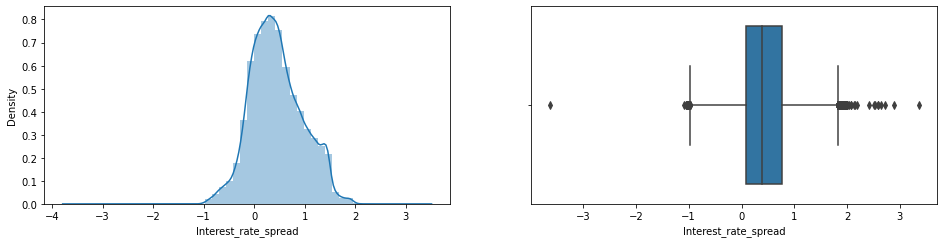

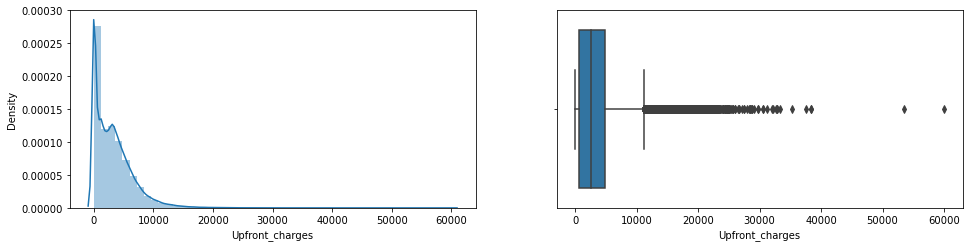

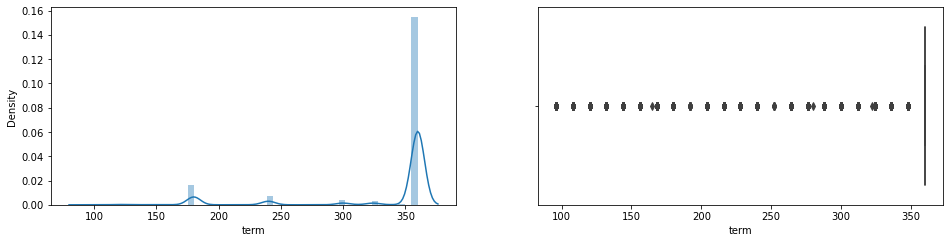

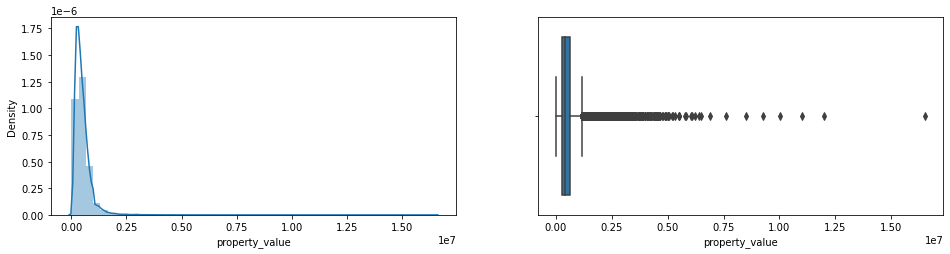

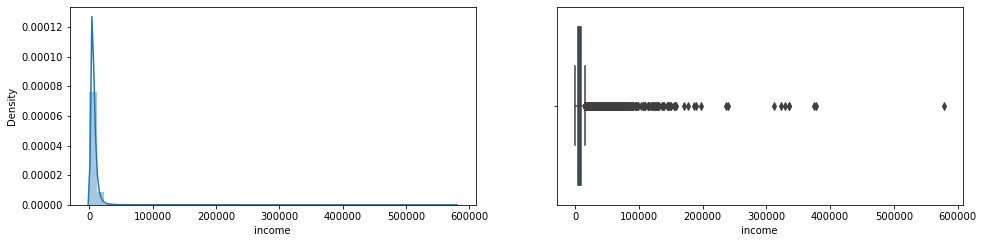

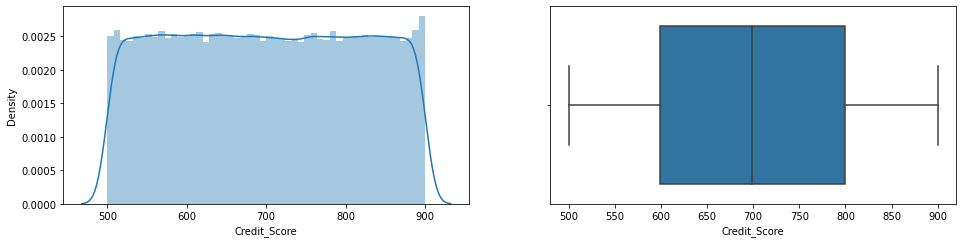

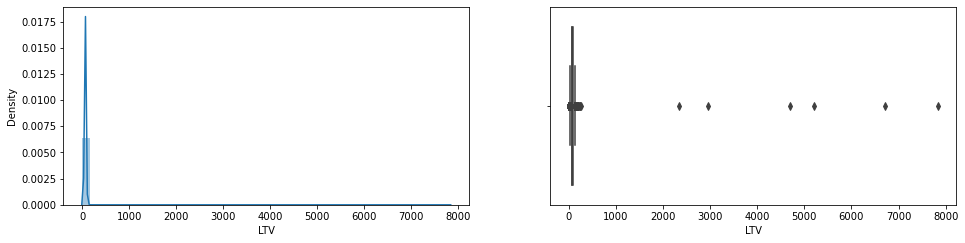

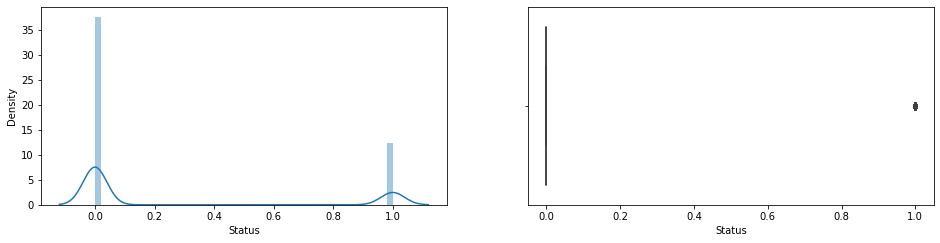

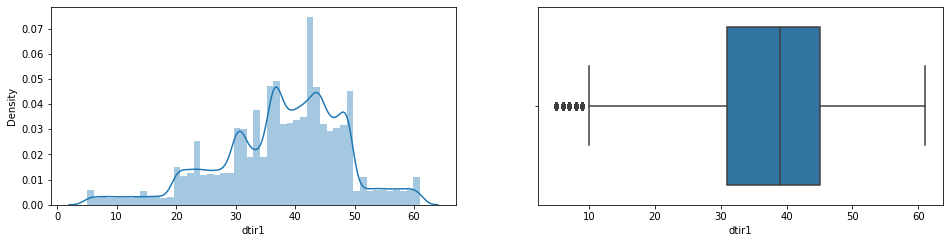

In [154]:
plt.figure(figsize = (15,8))
columns=df.select_dtypes(include=np.number)
for i in columns:
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[i])
    plt.subplot(2,2,2)
    sns.boxplot(df[i])

**Interpretation**: 

1.) From this we can see that features like loan_amount,Upfront_charges,property_value, income are rightly skewed.

2.) rate_of_interest,Interest_rate_spread are nearly normaly distributed

3.) dtir is left skewed.

4.) ID is a unique value.

5.) we have only one year data i.e., 2019.

In [155]:
df = df.drop(['ID','year'], axis = 1)
df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.000000,not_neg,not_int,not_lpsm,118000.000000,sb,pr,home,1U,1740.000000,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.000000,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.000000,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.200000,595.000000,360.000000,neg_amm,not_int,not_lpsm,508000.000000,sb,pr,home,1U,9480.000000,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.681000,NaN,360.000000,not_neg,not_int,not_lpsm,658000.000000,sb,pr,home,1U,11880.000000,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.304200,0.000000,360.000000,not_neg,not_int,not_lpsm,758000.000000,sb,pr,home,1U,10440.000000,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000


### **2.) Distribution of Categorical Variables**

In [156]:
pd.Series({col: df[col].unique() for col in df.select_dtypes("object").columns})

loan_limit                                                      [cf, nan, ncf]
Gender                                [Sex Not Available, Male, Joint, Female]
approv_in_adv                                                [nopre, pre, nan]
loan_type                                                [type1, type2, type3]
loan_purpose                                             [p1, p4, p3, p2, nan]
Credit_Worthiness                                                     [l1, l2]
open_credit                                                        [nopc, opc]
business_or_commercial                                            [nob/c, b/c]
Neg_ammortization                                      [not_neg, neg_amm, nan]
interest_only                                              [not_int, int_only]
lump_sum_payment                                              [not_lpsm, lpsm]
construction_type                                                     [sb, mh]
occupancy_type                                      

**Interpretation**: Here we get the unique values for all the categorical variables.


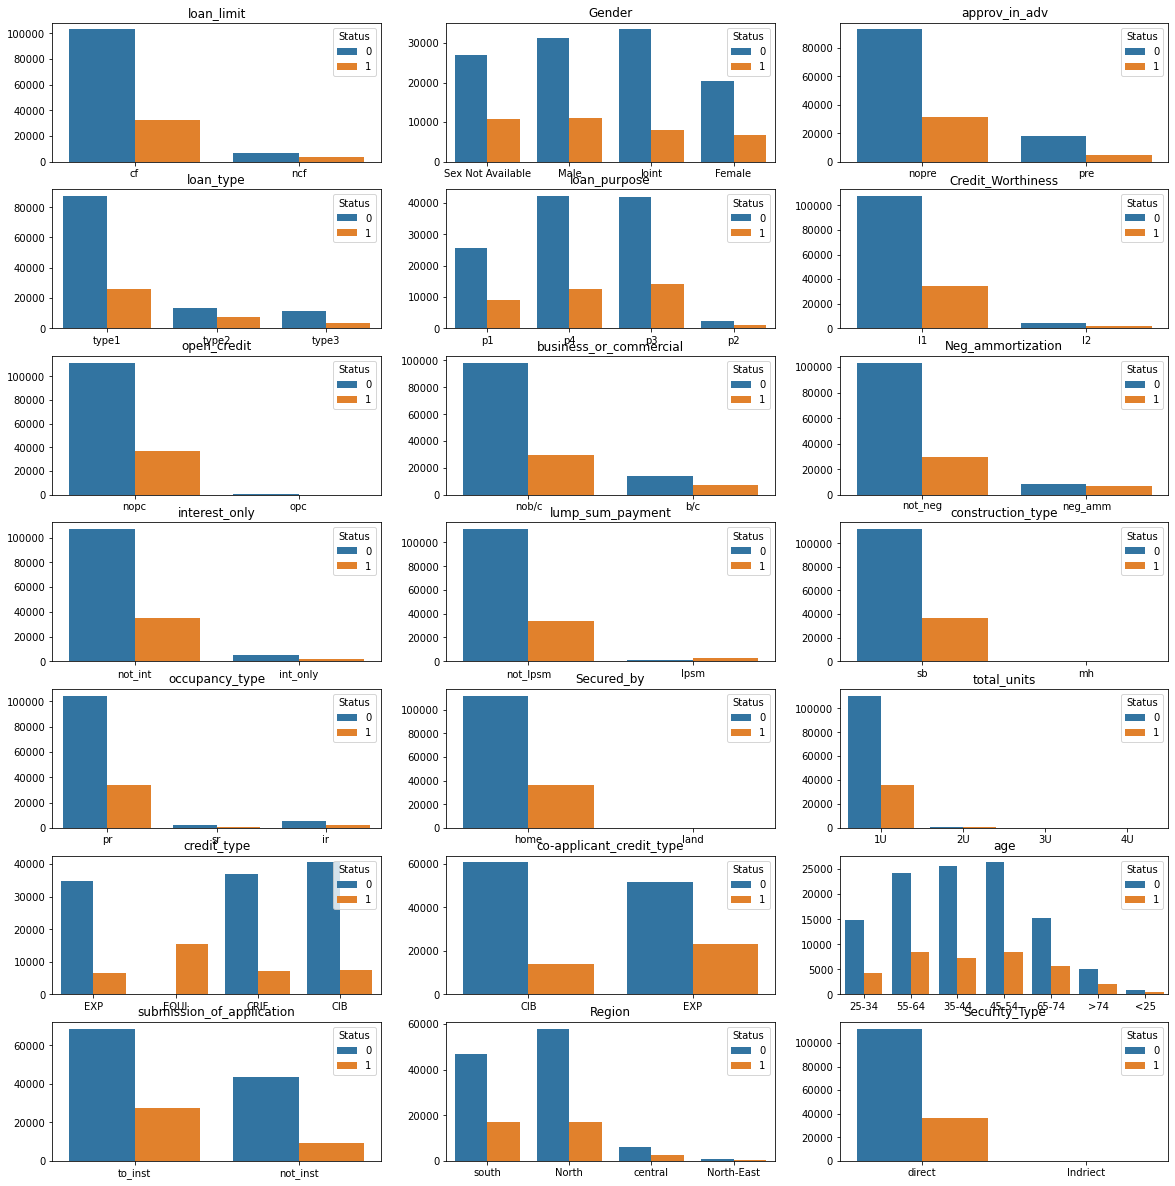

In [157]:
import itertools
plt.figure(figsize = [20,24])
df_cat=df.select_dtypes(include='object').columns
for i,j in itertools.zip_longest(df_cat,range(len(df_cat))):
    plt.subplot(8,3,j+1)
    ax = sns.countplot(df[i], hue = df["Status"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Interpretation:**

1.) Loan Limit with type "cf" has large number number of Loan approved and no approved as compared to type "ncf".

2.) Loan approval with Joint account is more as compared to others. 

3.) Loan Type: It shows that most of people have gone with type 1 , and almost same number of people took loan type 2 and 3. 

4.) Most people have secured by Home, and almost no one have secured by land.

5.) Most loan apprved and passed are from Region North and South. Very less loan passed from Central and North-East Region

6.) Loan approval through not pre approved is more than pre approved.

### **3.) Distribution of target variable**

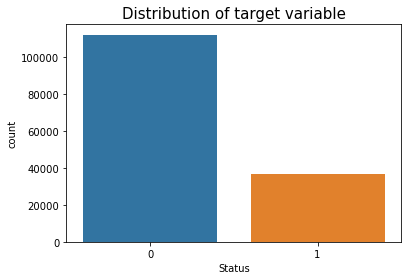

In [158]:
sns.countplot(df['Status'])
plt.title('Distribution of target variable', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Distribution of Gender')

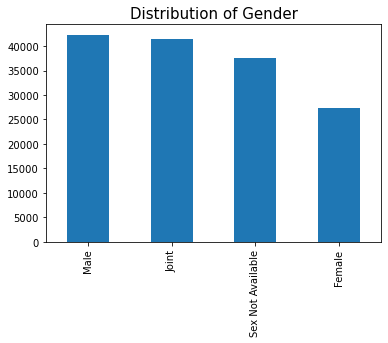

In [159]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender', fontsize=15)

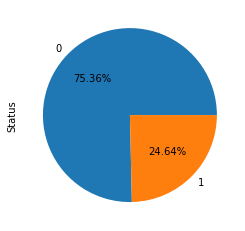

In [160]:
df['Status'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.xticks(rotation=36)
plt.show()

**Interpretation:** From this we can say that our data is highly imbalanced as there is huge difference b/w Loan Approved and Not Approved

## Shape of Data

In [161]:
skew = df.skew()
print(skew)

loan_amount              1.666998
rate_of_interest         0.388406
Interest_rate_spread     0.280762
Upfront_charges          1.754076
term                    -2.174822
property_value           4.586276
income                  17.307695
Credit_Score             0.004767
LTV                    120.615337
Status                   1.176762
dtir1                   -0.551465
dtype: float64


Interpretation: The above value represents that the variable loan_amount,upfront_charges,property_value,income,LTV,Status are highly positively skewed.
The variables rate_of_interest,Interest_rate_spread,Credit_Score are near normal.
The variable term has negative skewness.
The variable LTV has high positive skewness
Note: It is advisable to check the distribution plot before making any conclusion.

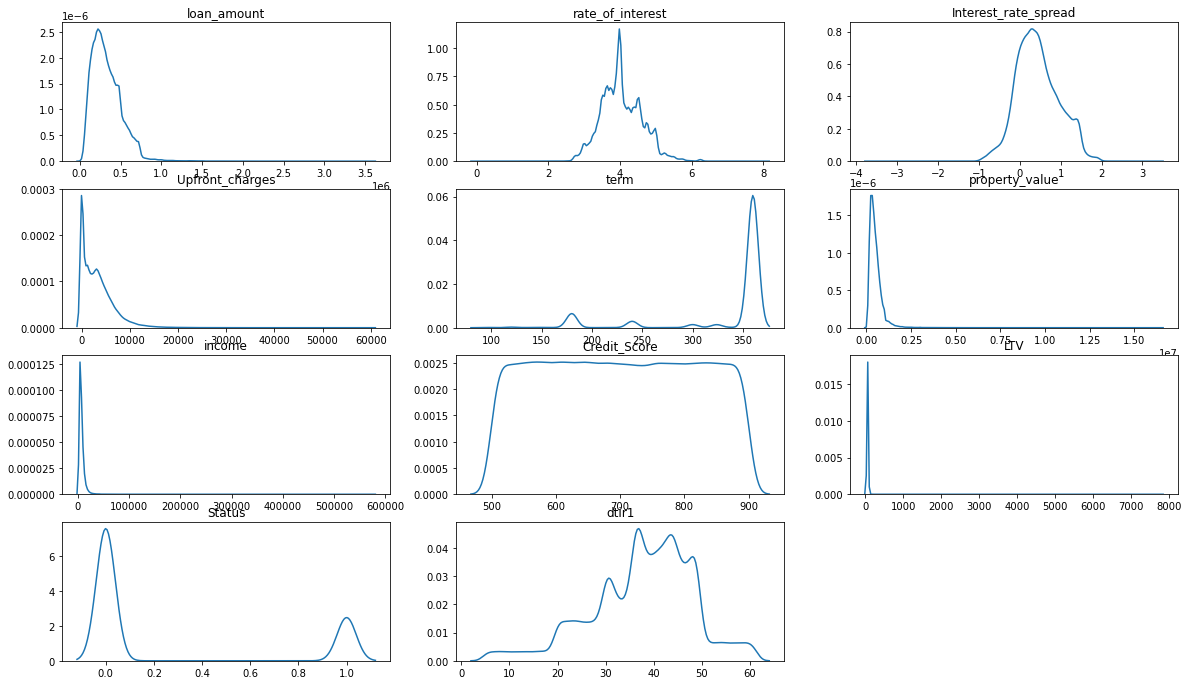

In [162]:
import itertools
plt.figure(figsize = [20,24])
columns=df.select_dtypes(include='number').columns
for i,j in itertools.zip_longest(columns,range(len(columns))):
    plt.subplot(8,3,j+1)
    z=sns.kdeplot(data=df[i])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Interpretation:**

1.) From this we can see that features like income, property value, upfront charge, loan amount, Status, LTV are left skewed.

2.) rate_of_interest,Interest_rate_spread are nearly normaly distributed

3.) dtir,term is right skewed italicized text

## **Multivariate Analysis**

Multivariate analysis is used to study two or more variables in the data. The main purpose is to understand the relationship between the variables using various statistical and visualization techniques. The analysis helps to find the variables which are highly correlated to each other; also, it exhibits the effect of one variable on other variables in the data. 

### **Correlation Of the data.**  (Relationship of variables with each other)

In [163]:
df.corr()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
loan_amount,1.000000,-0.150844,-0.377272,0.065556,0.174474,0.734249,0.456065,0.004438,0.038869,-0.036825,0.015029
rate_of_interest,-0.150844,1.000000,0.614908,-0.076473,0.209330,-0.122613,-0.041809,-0.001331,-0.000220,0.022957,0.055124
Interest_rate_spread,-0.377272,0.614908,1.000000,0.033037,-0.157139,-0.334571,-0.151333,-0.001738,0.040257,NaN,0.078178
Upfront_charges,0.065556,-0.076473,0.033037,1.000000,-0.054960,0.053043,0.016580,-0.001484,-0.031347,-0.019138,0.000115
term,0.174474,0.209330,-0.157139,-0.054960,1.000000,0.045117,-0.053785,-0.003149,0.106834,-0.000240,0.110572
property_value,0.734249,-0.122613,-0.334571,0.053043,0.045117,1.000000,0.414883,0.002430,-0.215102,-0.048864,-0.056288
income,0.456065,-0.041809,-0.151333,0.016580,-0.053785,0.414883,1.000000,0.000802,-0.066203,-0.065119,-0.267807
Credit_Score,0.004438,-0.001331,-0.001738,-0.001484,-0.003149,0.002430,0.000802,1.000000,-0.005533,0.004004,-0.000313
LTV,0.038869,-0.000220,0.040257,-0.031347,0.106834,-0.215102,-0.066203,-0.005533,1.000000,0.038895,0.156557
Status,-0.036825,0.022957,NaN,-0.019138,-0.000240,-0.048864,-0.065119,0.004004,0.038895,1.000000,0.078083


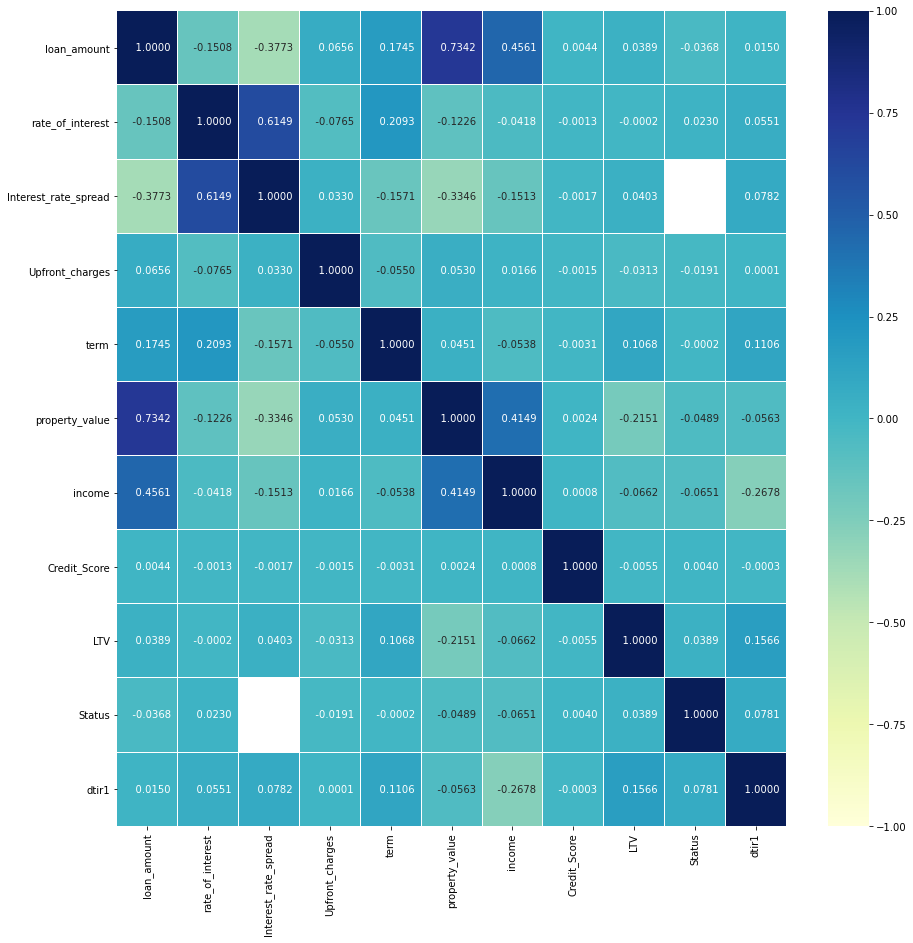

In [164]:
fig,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')
plt.show()

**Interpretation:** 

1.) Property value and Loan Amount are positively correlated. So we can say that as the value of property increases, the loan amount also tends to increase.

2.) Income and Loan amount are aslo positively correlated. So we can say that people with high income can take more loan amount. 

3.) rate of intrest and rate of spread are positivly correlated with each other.

## **Pair Plot**

In [165]:
# plt.figure(figsize = (15,8))
# sns.pairplot(data=df)

## **Bi-Variate Analysis**

### **1.) Numerical vs Numerical**

**Loan Amount vs Term**

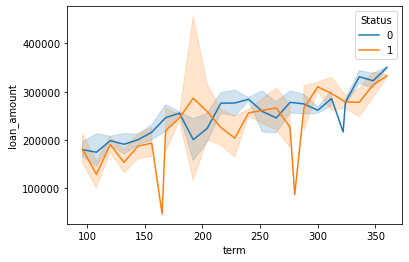

In [166]:
sns.lineplot(data=df, x='term', y='loan_amount', hue='Status')
plt.show()

Interpretation: If loan amount is more, then term is more

**Loan Amount vs Property Value**

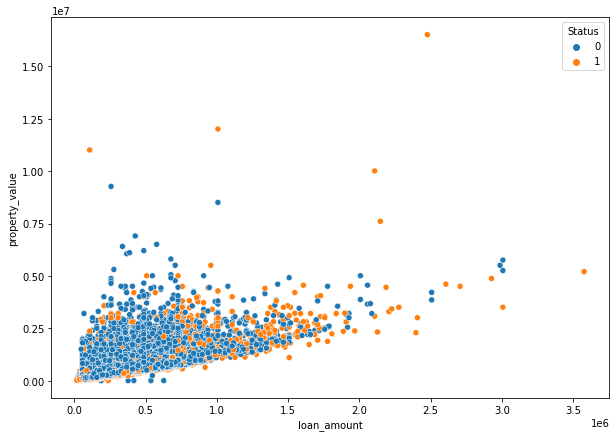

In [167]:
plt.rcParams["figure.figsize"] = [10,7]
sns.scatterplot(data=df,x='loan_amount',y='property_value',hue='Status')
ax.set_ylabel('property_value', fontsize=20)
ax.set_xlabel('loan_amount', fontsize=20)
plt.show()

**Loan Amount vs Rate of interest**

<AxesSubplot:xlabel='rate_of_interest', ylabel='loan_amount'>

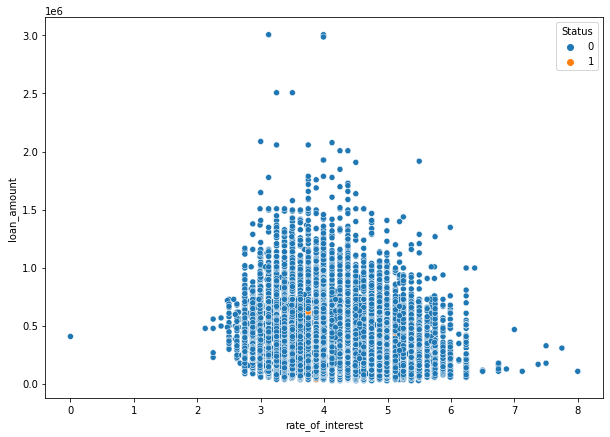

In [168]:
sns.scatterplot(data=df, x='rate_of_interest', y='loan_amount', hue='Status')

**Loan Amount vs Upfront Charge**

<AxesSubplot:xlabel='Upfront_charges', ylabel='loan_amount'>

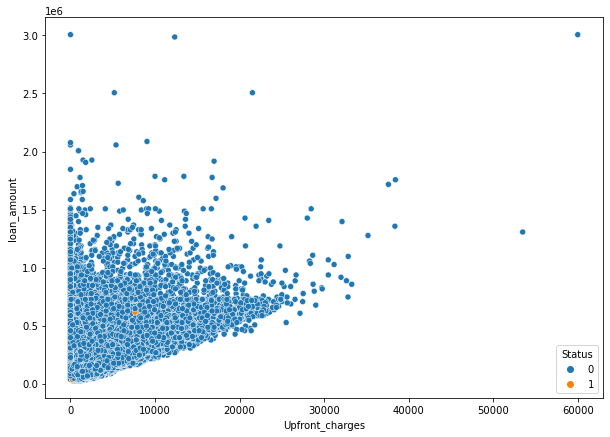

In [169]:
sns.scatterplot(data=df, x='Upfront_charges', y='loan_amount', hue='Status')

**`Income and Loan Amount`**

<AxesSubplot:xlabel='income', ylabel='loan_amount'>

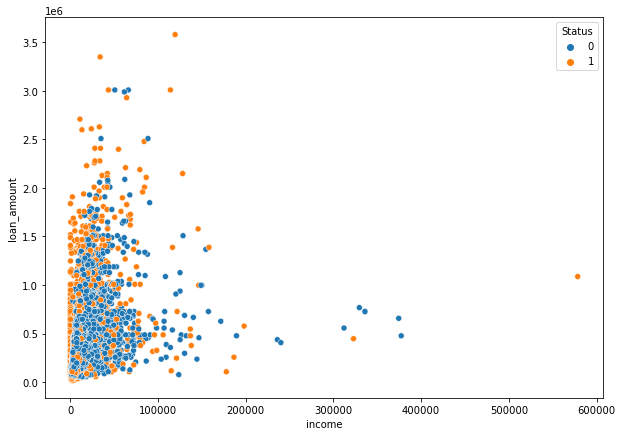

In [170]:
sns.scatterplot(data=df, x='income', y='loan_amount', hue='Status')

**Income  vs Property value**

<AxesSubplot:xlabel='income', ylabel='property_value'>

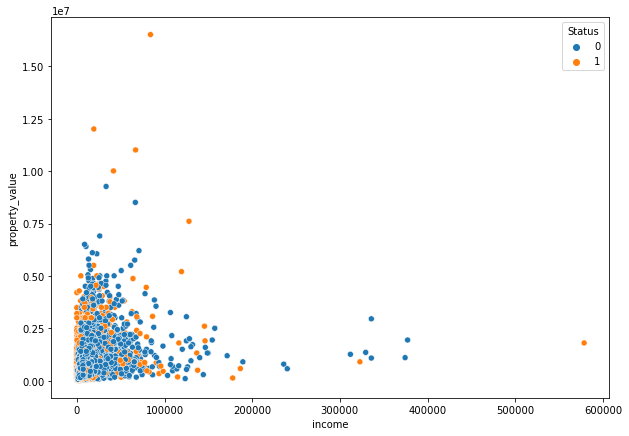

In [171]:
sns.scatterplot(data=df, x='income', y='property_value', hue='Status')

**Income vs Credit Score**

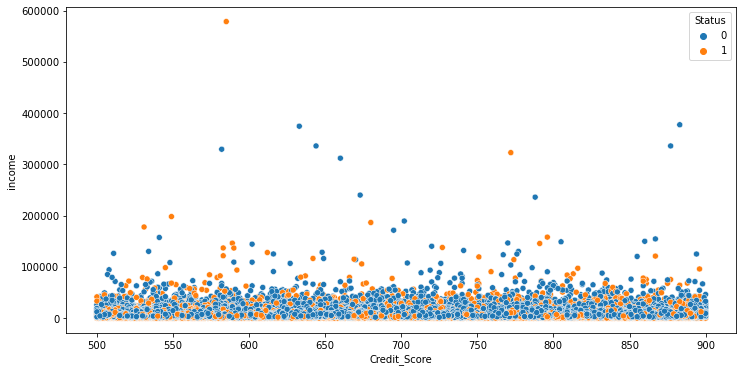

In [172]:
fig,ax=plt.subplots()
sns.scatterplot(x='Credit_Score',y='income',data=df,hue='Status')
fig.set_size_inches([12,6])
plt.show()

**Credit score vs Loan Amount**

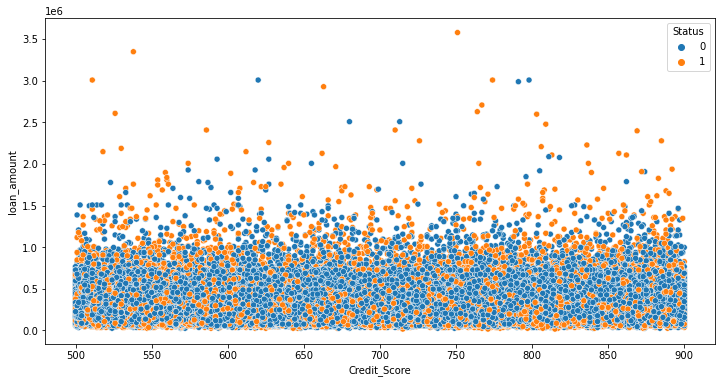

In [173]:
fig,ax=plt.subplots()
sns.scatterplot(x='Credit_Score',y='loan_amount',data=df,hue='Status')
fig.set_size_inches([12,6])
plt.show()

Interpretation: All the numerical columns seems to be not correlated

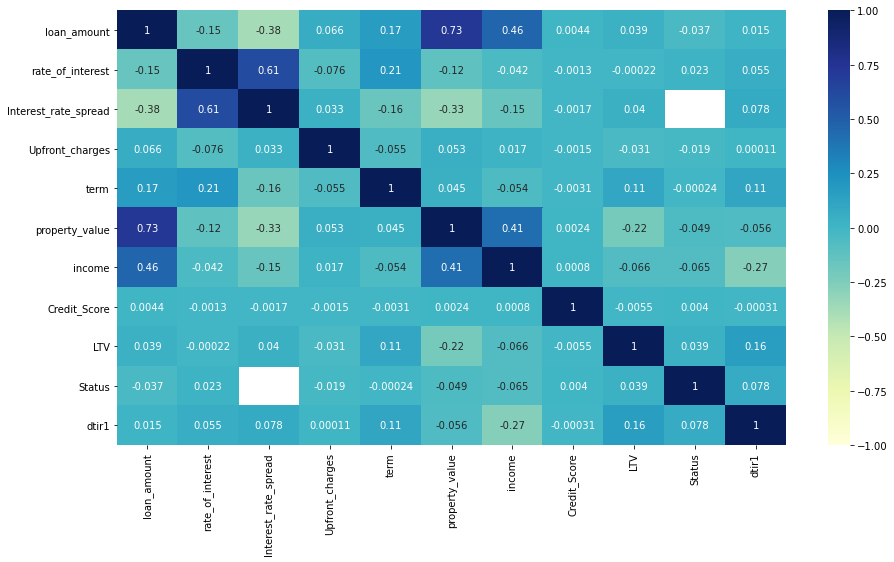

In [174]:
plt.rcParams["figure.figsize"] = [15,8]
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)
plt.show()

### **2.)Numerical vs Categorical**

**Income vs Loan Approval**

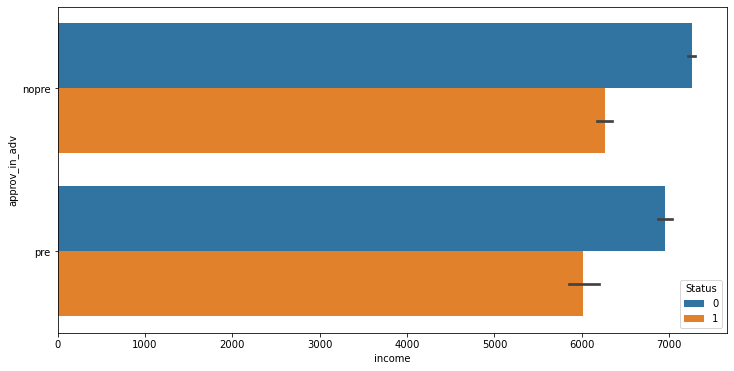

In [175]:
fig,ax=plt.subplots()
sns.barplot(data=df,x='income',y='approv_in_adv',hue='Status')
fig.set_size_inches([12,6])
plt.show()

**Loan Amount vs approve in advance**

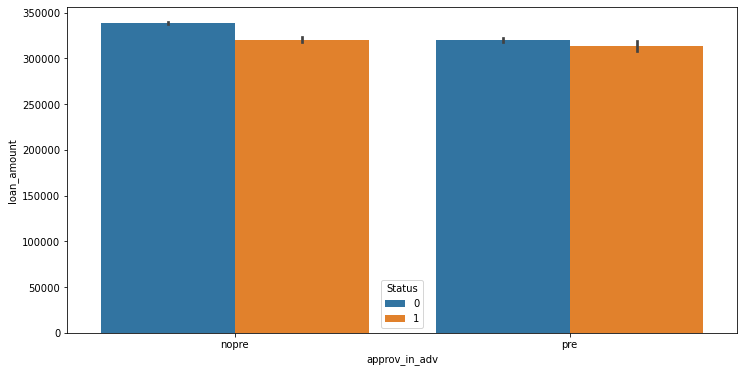

In [176]:
fig,ax=plt.subplots()
sns.barplot(data=df,x='approv_in_adv',y='loan_amount',hue='Status')
fig.set_size_inches([12,6])
plt.show()

**Loan Amount vs Age**

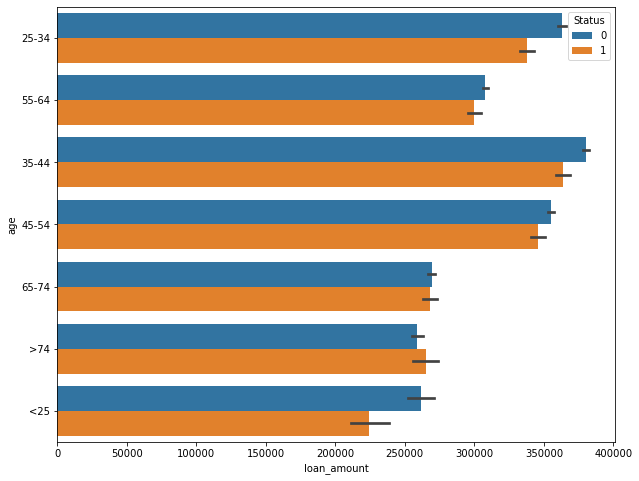

In [177]:
fig,ax=plt.subplots()
sns.barplot(data=df,x='loan_amount',y='age',hue='Status')
fig.set_size_inches([10,8])
plt.show()

**Loan Amount vs Gender**

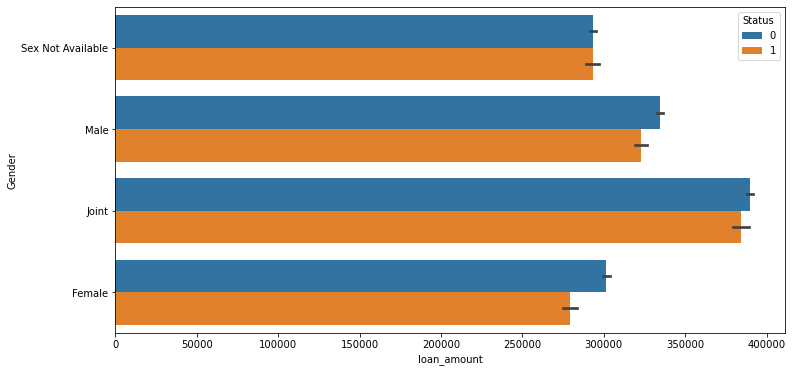

In [178]:
fig,ax=plt.subplots()
sns.barplot(data=df,x='loan_amount',y='Gender',hue='Status')
fig.set_size_inches([12,6])
plt.show()

**Loan amount vs loan purpose**

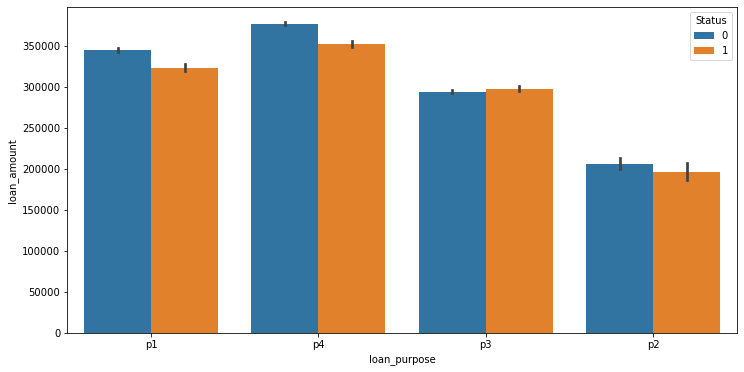

In [179]:
fig,ax=plt.subplots()
sns.barplot(data=df,x='loan_purpose',y='loan_amount',hue='Status')
fig.set_size_inches([12,6])
plt.show()

**Gender vs Income**

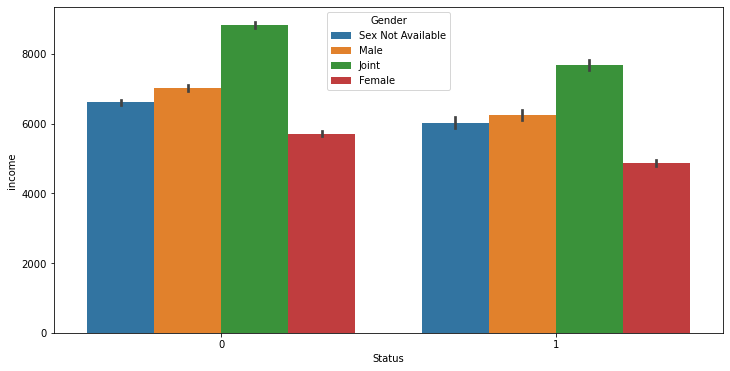

In [180]:
fig,ax=plt.subplots()
sns.barplot(data=df,x='Status',y='income',hue='Gender')
fig.set_size_inches([12,6])
plt.show()

### **3.)Categorical vs Categorical**

#### Checking if the approved and not approved cases for each age range

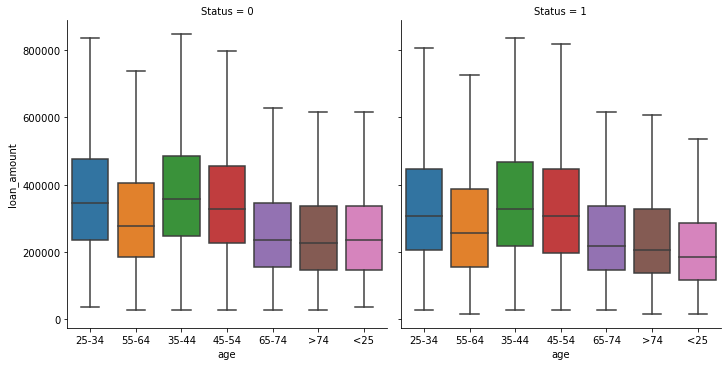

In [181]:
sns.catplot(data=df,x='age',y='loan_amount',kind='box',col='Status',sym="")

Mean of loan amount for group 35-44 and 45-54 is almost similar to each other. loan amount for groups 25-34,35-44,45-54 is more compared to other groups

**Gender vs Status**


<AxesSubplot:xlabel='Gender', ylabel='Status'>

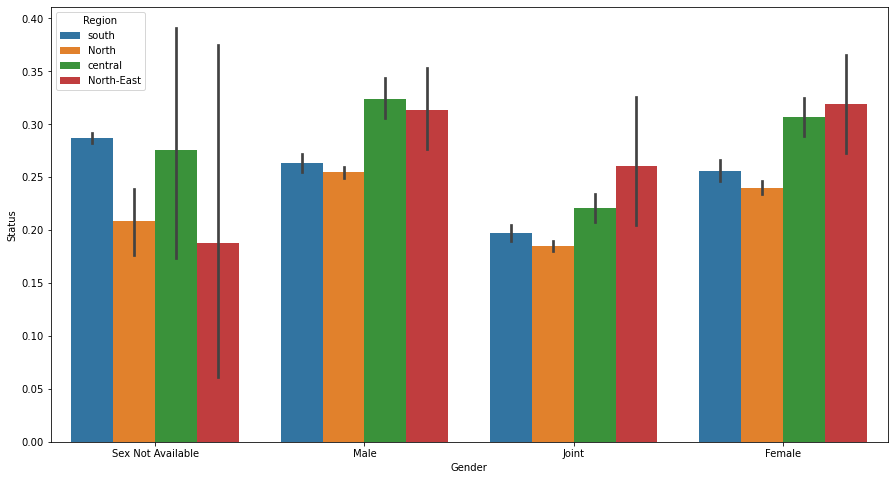

In [182]:
sns.barplot('Gender','Status',data=df,hue='Region'  )

# Statistical Tests



In [183]:
from scipy import stats
df1=df.copy()
df1['Status']=df1['Status'].astype('category')
categorical_columns = df1.select_dtypes(include = [np.object])
categorical_columns.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [184]:
p_values = []
for i in ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type']:
    pval = stats.chi2_contingency(pd.crosstab(df1['Status'], df1[i]))[1]
    p_values.append(pval)

Hypothesis of Chi-square test

H0 : Attributes are independent

H1 : Attributes are dependent

In [185]:
p_val_cat = pd.DataFrame({'Feature': ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
                         'p_values' : p_values})
p_val_cat

,Feature,p_values
0,loan_limit,0.000000
1,Gender,0.000000
2,approv_in_adv,0.000000
3,loan_type,0.000000
4,loan_purpose,0.000000
5,Credit_Worthiness,0.000000
6,open_credit,0.000146
7,business_or_commercial,0.000000
8,Neg_ammortization,0.000000
9,interest_only,0.000000


Since the p_values is less than 0.05, we reject the null hypothesis. Hence all the features are significant.

## **Missing Value Treatment with KNN imputer**

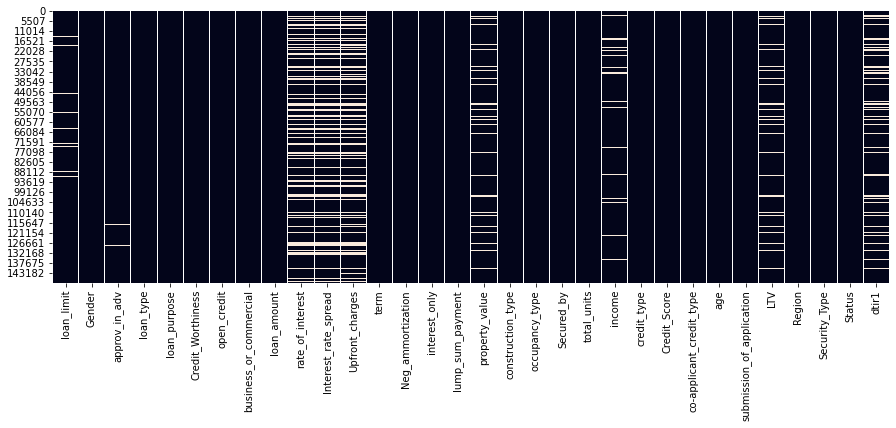

In [186]:
plt.rcParams["figure.figsize"]=[15,5]
sns.heatmap(df.isnull(), cbar = False)
plt.show()

**Interpretation**:  We have Null value in loan_limit , rate of interes, interest rate spread, upfront spread, property value, income, LTV and dtir1. 
So will need to handle these variable using Missing value Treatment


In [187]:
df_impute=df.copy()

In [188]:
# df_impute.isnull().sum()
Total = df_impute.isnull().sum().sort_values(ascending=False)          
Percent = (df_impute.isnull().sum()*100/df_impute.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Upfront_charges,39642,26.664425
Interest_rate_spread,36639,24.644515
rate_of_interest,36439,24.509989
dtir1,24121,16.224524
LTV,15098,10.155378
property_value,15098,10.155378
income,9150,6.154571
loan_limit,3344,2.249277
approv_in_adv,908,0.610749
submission_of_application,200,0.134526


In [189]:
df_impute_cat=df_impute.select_dtypes(np.object)
df_impute_cat.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [190]:
df_impute_cat.shape

(148670, 21)

In [191]:
df_impute_num=df_impute.select_dtypes(np.number)
df_impute_num.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

In [192]:
from sklearn.impute import KNNImputer
for i in df_impute_num.columns:
    knn_imputer=KNNImputer(n_neighbors=7,weights='uniform')
    df_impute_num[[i]]=knn_imputer.fit_transform(df_impute_num[[i]])   

In [193]:
# from sklearn.impute import KNNImputer
# knn_imputer=KNNImputer(n_neighbors=7,weights='uniform')
# df_impute_num[['loan_amount','term','Credit_Score','rate_of_interest','Interest_rate_spread','Upfront_charges','property_value','income','LTV','dtir1']]=knn_imputer.fit_transform(df_impute_num[['loan_amount','term','Credit_Score','rate_of_interest','Interest_rate_spread','Upfront_charges','property_value','income','LTV','dtir1']])


In [194]:
df_impute_cat['loan_limit']= df_impute_cat['loan_limit'].fillna(df_impute_cat['loan_limit'].mode()[0])
df_impute_cat['approv_in_adv']=df_impute_cat['approv_in_adv'].fillna(df_impute_cat['approv_in_adv'].mode()[0])
df_impute_cat['loan_purpose']=df_impute_cat['loan_purpose'].fillna(df_impute_cat['loan_purpose'].mode()[0])
df_impute_cat['Neg_ammortization']=df_impute_cat['Neg_ammortization'].fillna(df_impute_cat['Neg_ammortization'].mode()[0])
df_impute_cat['age']=df_impute_cat['age'].fillna(df_impute_cat['age'].mode()[0])
df_impute_cat['submission_of_application']=df_impute_cat['submission_of_application'].fillna(df_impute_cat['submission_of_application'].mode()[0])

In [197]:
df=pd.concat([df_impute_num,df_impute_cat],axis=1)

In [198]:
df.shape

(148670, 32)

In [199]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
loan_amount,0,0.000000
rate_of_interest,0,0.000000
Region,0,0.000000
submission_of_application,0,0.000000
age,0,0.000000
co-applicant_credit_type,0,0.000000
credit_type,0,0.000000
total_units,0,0.000000
Secured_by,0,0.000000
occupancy_type,0,0.000000


In [200]:
df.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,116500.000000,4.045476,0.441656,3224.996127,360.000000,118000.000000,1740.000000,758.000000,98.728814,1.000000,45.000000,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,206500.000000,4.045476,0.441656,3224.996127,360.000000,497893.465696,4980.000000,552.000000,72.746457,1.000000,37.732932,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,406500.000000,4.560000,0.200000,595.000000,360.000000,508000.000000,9480.000000,834.000000,80.019685,0.000000,46.000000,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,456500.000000,4.250000,0.681000,3224.996127,360.000000,658000.000000,11880.000000,587.000000,69.376900,0.000000,42.000000,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,696500.000000,4.000000,0.304200,0.000000,360.000000,758000.000000,10440.000000,602.000000,91.886544,0.000000,39.000000,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


# Outlier Identification

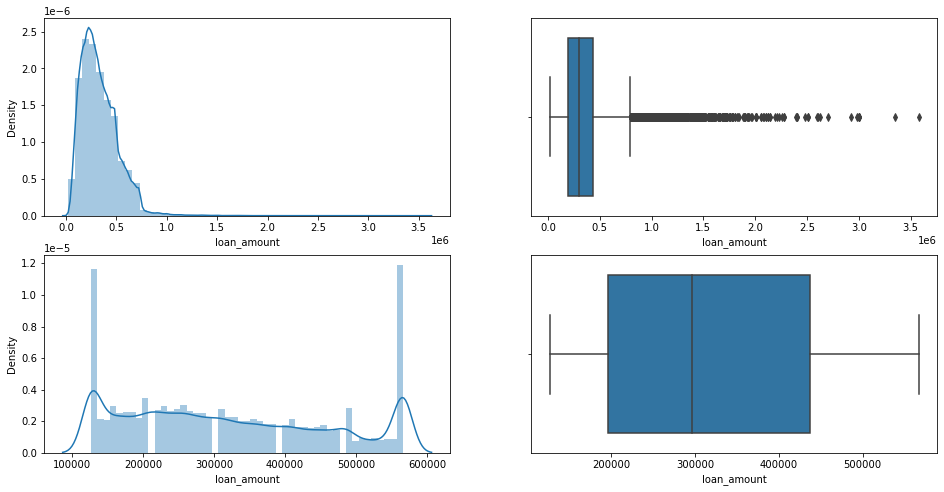

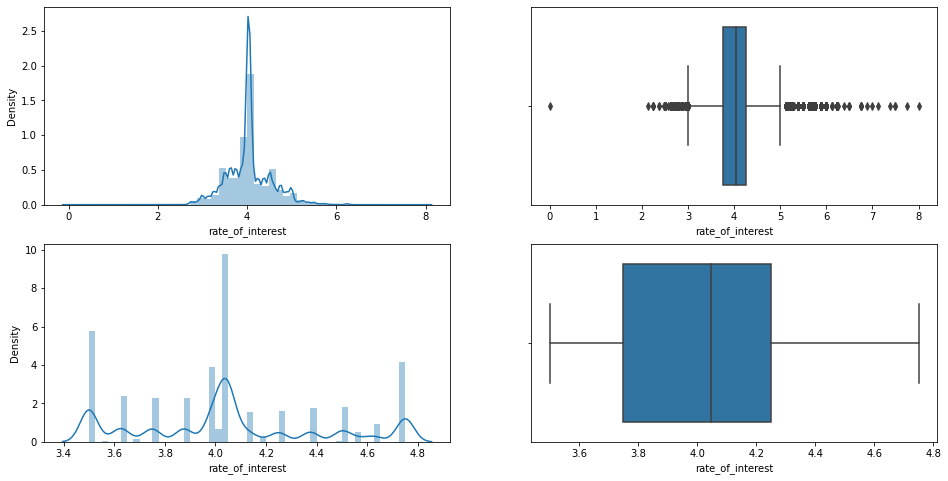

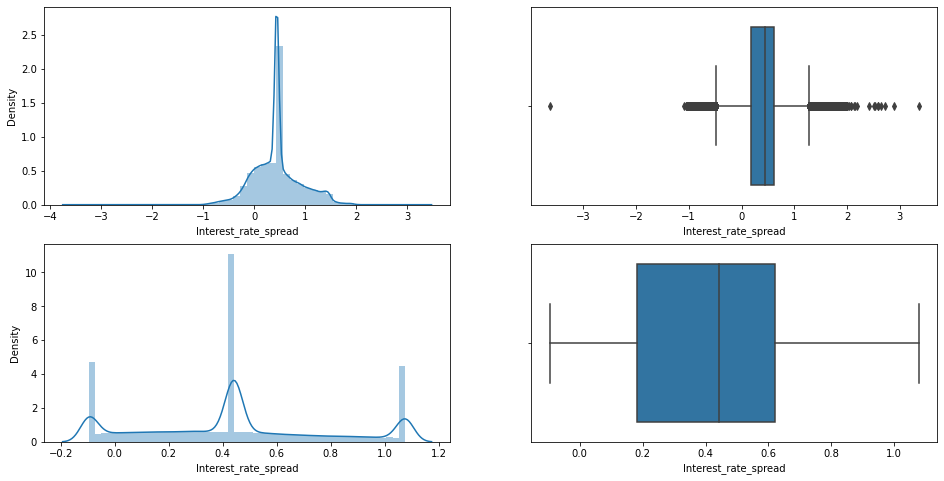

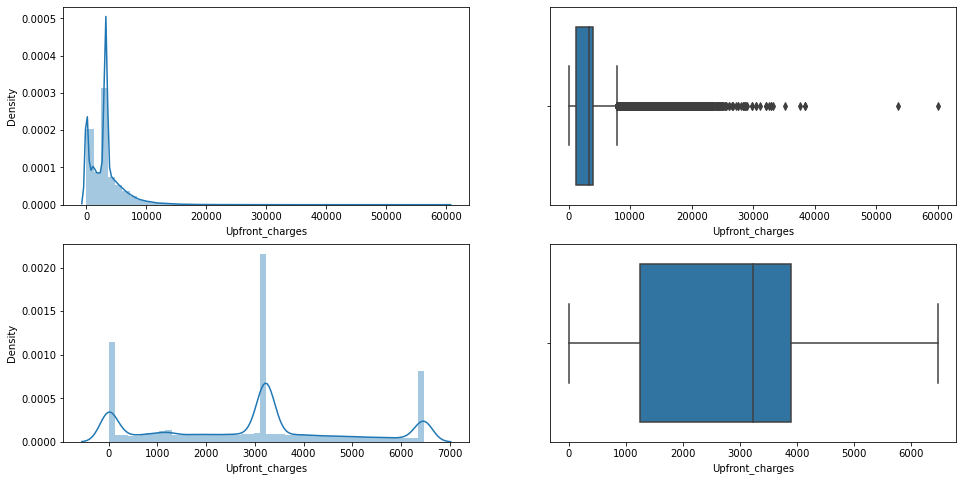

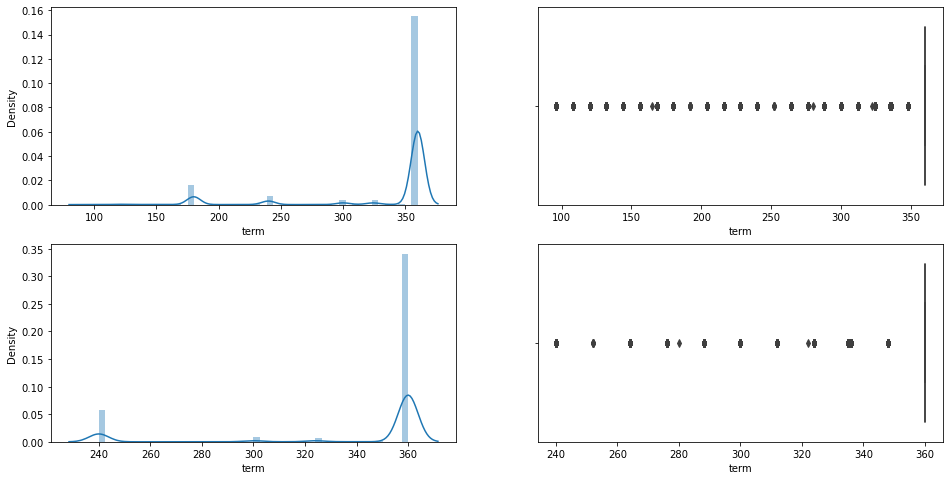

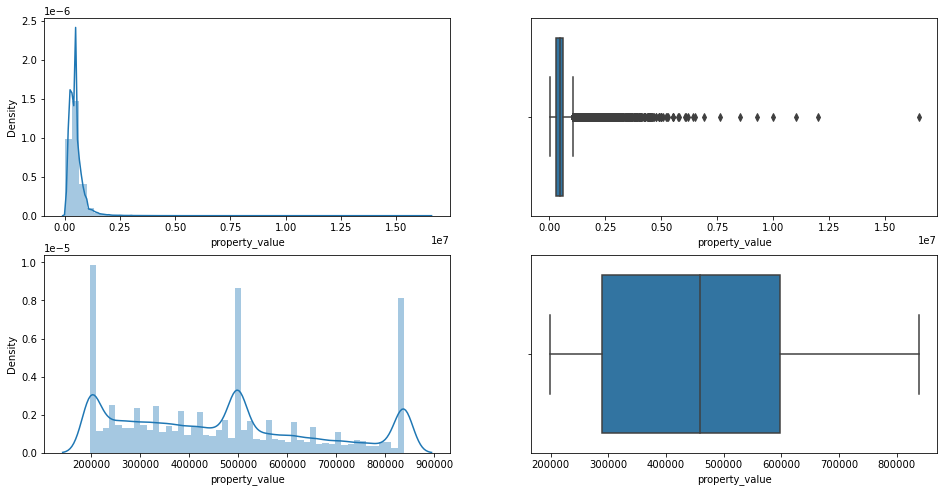

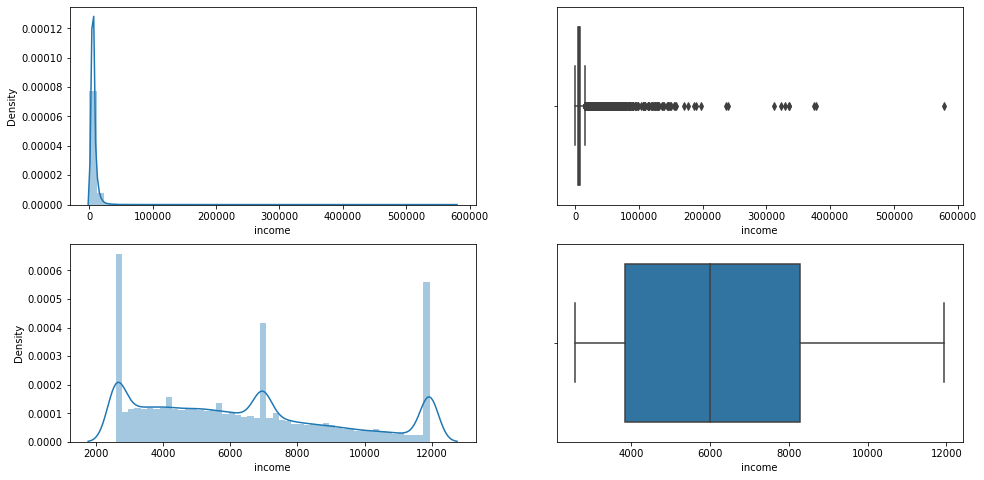

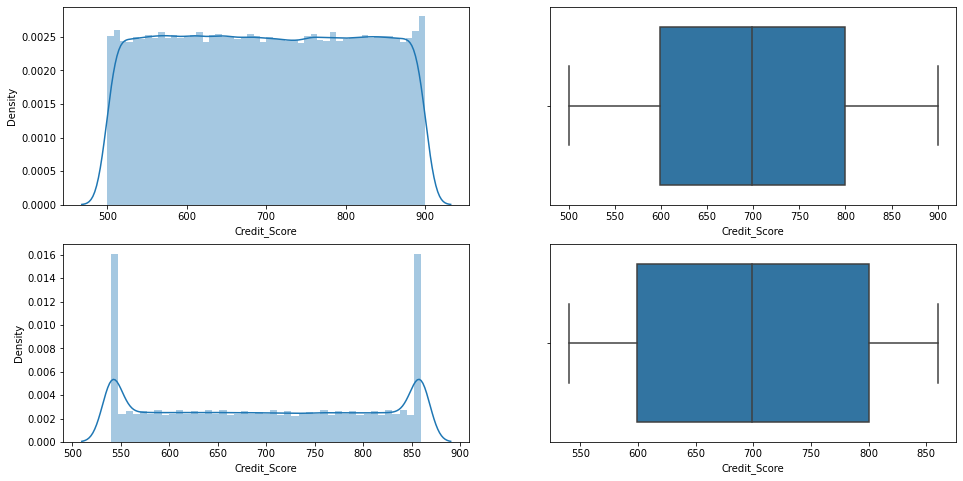

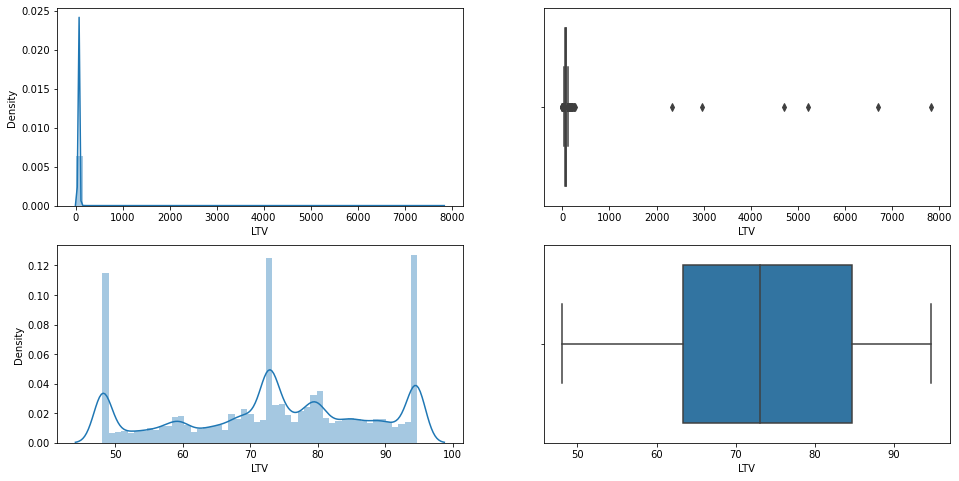

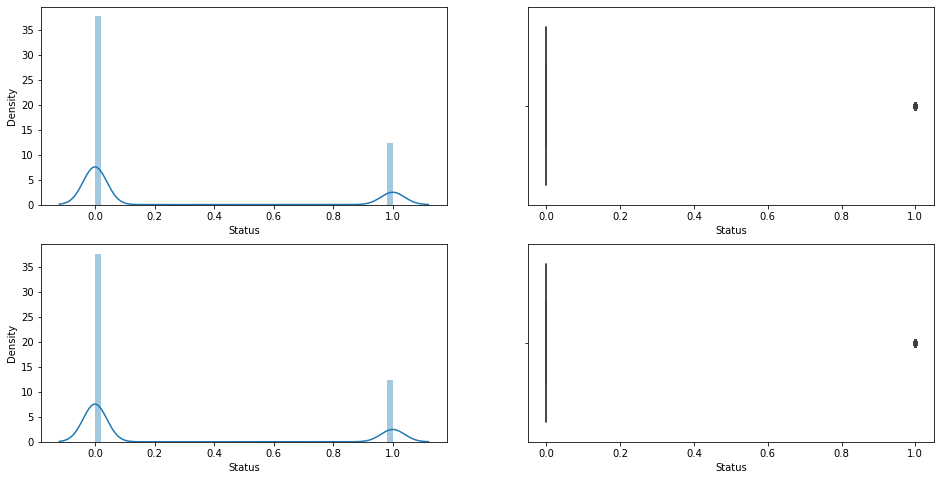

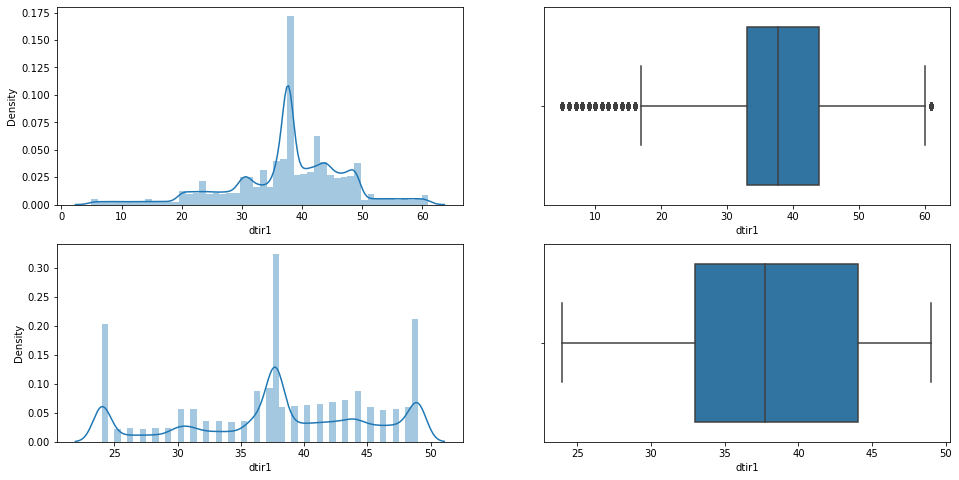

In [201]:
for i in columns:
    lower_limit=df[i].quantile(0.10)
    uper_limit=df[i].quantile(0.90)
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[i])
    plt.subplot(2,2,2)
    sns.boxplot(df[i])
    df[i] = np.where(df[i] <lower_limit, lower_limit,df[i])
    df[i] = np.where(df[i] >uper_limit, uper_limit,df[i])
    plt.subplot(2,2,3)
    sns.distplot(df[i])
    plt.subplot(2,2,4)
    sns.boxplot(df[i])

## Encoding Catregorical Variables

In [202]:
X=df.drop('Status',axis=1)
y=df['Status']

In [203]:
y.value_counts()

0.000000    112031
1.000000     36639
Name: Status, dtype: int64

In [204]:
n_unique_values = 10
all_columns = df.columns.to_list()
categorical_columns = []

for i, column in enumerate(all_columns):
    temp = df.loc[:, column].unique()
    if len(temp) < n_unique_values:
        print (f"{i+1}. {column} has {len(temp)} unique values, which are {temp}") 
        categorical_columns.append(column)
del temp

10. Status has 2 unique values, which are [1. 0.]
12. loan_limit has 2 unique values, which are ['cf' 'ncf']
13. Gender has 4 unique values, which are ['Sex Not Available' 'Male' 'Joint' 'Female']
14. approv_in_adv has 2 unique values, which are ['nopre' 'pre']
15. loan_type has 3 unique values, which are ['type1' 'type2' 'type3']
16. loan_purpose has 4 unique values, which are ['p1' 'p4' 'p3' 'p2']
17. Credit_Worthiness has 2 unique values, which are ['l1' 'l2']
18. open_credit has 2 unique values, which are ['nopc' 'opc']
19. business_or_commercial has 2 unique values, which are ['nob/c' 'b/c']
20. Neg_ammortization has 2 unique values, which are ['not_neg' 'neg_amm']
21. interest_only has 2 unique values, which are ['not_int' 'int_only']
22. lump_sum_payment has 2 unique values, which are ['not_lpsm' 'lpsm']
23. construction_type has 2 unique values, which are ['sb' 'mh']
24. occupancy_type has 3 unique values, which are ['pr' 'sr' 'ir']
25. Secured_by has 2 unique values, which are

In [205]:
df_num = X.select_dtypes(include = [np.number])
df_num.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1'],
      dtype='object')

In [206]:
# categorical_columns
categorical_columns = X.select_dtypes(include = [np.object])
categorical_columns.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [207]:
dummy_var = pd.get_dummies(data = categorical_columns, drop_first = True)
dummy_var.head()

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1
3,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


We have done one hot encoding for all the catogerical columns.

In [208]:
X_new = pd.concat([df_num, dummy_var], axis=1)

In [209]:
X_new.shape

(148670, 48)

In [210]:
X_new.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,126500.000000,4.045476,0.441656,3224.996127,360.000000,198000.000000,2580.000000,758.000000,94.724771,45.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1
1,206500.000000,4.045476,0.441656,3224.996127,360.000000,497893.465696,4980.000000,552.000000,72.746457,37.732932,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
2,406500.000000,4.560000,0.200000,595.000000,360.000000,508000.000000,9480.000000,834.000000,80.019685,46.000000,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1
3,456500.000000,4.250000,0.681000,3224.996127,360.000000,658000.000000,11880.000000,587.000000,69.376900,42.000000,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,566500.000000,4.000000,0.304200,0.000000,360.000000,758000.000000,10440.000000,602.000000,91.886544,39.000000,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [211]:
y.head()

0   1.000000
1   1.000000
2   0.000000
3   0.000000
4   0.000000
Name: Status, dtype: float64

In [212]:
X_new.shape

(148670, 48)

## **Logistic Regression**

In [213]:
from sklearn.metrics import classification_report,precision_score,recall_score,roc_auc_score

lr= LogisticRegression(C=1,verbose=0,solver = 'liblinear',random_state=17,class_weight='balanced')
lr.fit(X_new,y)
y_pred=lr.predict(X_new)



print("ConfusionMatrix:\n", confusion_matrix(y,y_pred))
print("Accuracy for Train:", accuracy_score(y,y_pred))
print("Precission:", precision_score(y,y_pred))
print("Recall:", recall_score(y,y_pred))
print("roc_auc_score:",roc_auc_score(y,y_pred))


ConfusionMatrix:
 [[79412 32619]
 [11881 24758]]
Accuracy for Train: 0.7006793569650904
Precission: 0.4314969412830925
Recall: 0.6757280493463249
roc_auc_score: 0.6922837834899185


## KNN

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_new,y)

KNeighborsClassifier(n_neighbors=3)

In [215]:
y_pred=knn.predict(X_new)

In [216]:
fin=accuracy_score(y,y_pred)
fin

0.9505952781327773

In [217]:
from sklearn.metrics import classification_report,precision_score,recall_score,roc_auc_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))


[[107609   4422]
 [  2923  33716]]
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97    112031
         1.0       0.88      0.92      0.90     36639

    accuracy                           0.95    148670
   macro avg       0.93      0.94      0.93    148670
weighted avg       0.95      0.95      0.95    148670



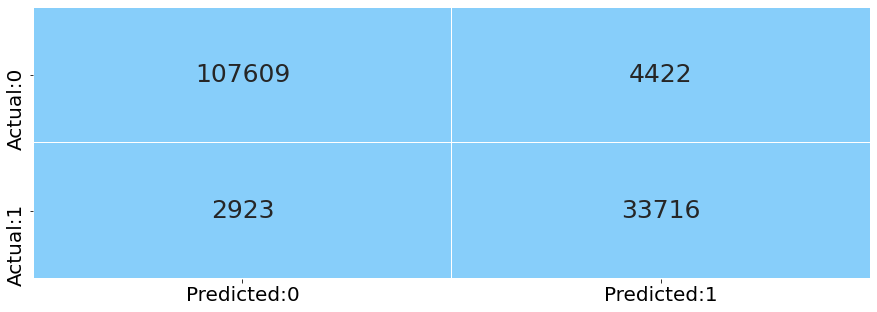

In [218]:
cm = confusion_matrix(y,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

In [219]:
print("Accuracy for Train:", accuracy_score(y,y_pred))
print("Precission:", precision_score(y,y_pred))
print("Recall:", recall_score(y,y_pred))
print("roc_auc_score:",roc_auc_score(y,y_pred))

Accuracy for Train: 0.9505952781327773
Precission: 0.8840526508993655
Recall: 0.9202216217691531
roc_auc_score: 0.9403752019906098


# Feature Eng 

In [221]:
y.value_counts()

0.000000    112031
1.000000     36639
Name: Status, dtype: int64

In [222]:
df_cat=df.select_dtypes(include=object)
for col in df_cat:
    print(col)
    print (df_cat[col].value_counts(normalize=True)*100, '\n')

loan_limit
cf    93.288491
ncf    6.711509
Name: loan_limit, dtype: float64 

Gender
Male                28.483218
Joint               27.846237
Sex Not Available   25.330598
Female              18.339948
Name: Gender, dtype: float64 

approv_in_adv
nopre   84.434654
pre     15.565346
Name: approv_in_adv, dtype: float64 

loan_type
type1   76.123630
type2   13.965158
type3    9.911213
Name: loan_type, dtype: float64 

loan_purpose
p3   37.713056
p4   36.859487
p1   23.225264
p2    2.202193
Name: loan_purpose, dtype: float64 

Credit_Worthiness
l1   95.744938
l2    4.255062
Name: Credit_Worthiness, dtype: float64 

open_credit
nopc   99.626017
opc     0.373983
Name: open_credit, dtype: float64 

business_or_commercial
nob/c   86.034842
b/c     13.965158
Name: business_or_commercial, dtype: float64 

Neg_ammortization
not_neg   89.823771
neg_amm   10.176229
Name: Neg_ammortization, dtype: float64 

interest_only
not_int    95.217596
int_only    4.782404
Name: interest_only, dtype: float6

In [223]:
X.drop(labels = ['loan_limit','Secured_by','property_value','construction_type',
                    'occupancy_type','total_units','lump_sum_payment',
                    'term','Security_Type','interest_only','Credit_Worthiness',
                    'Neg_ammortization','open_credit'], axis='columns', inplace=True)

In [224]:
X.shape

(148670, 18)

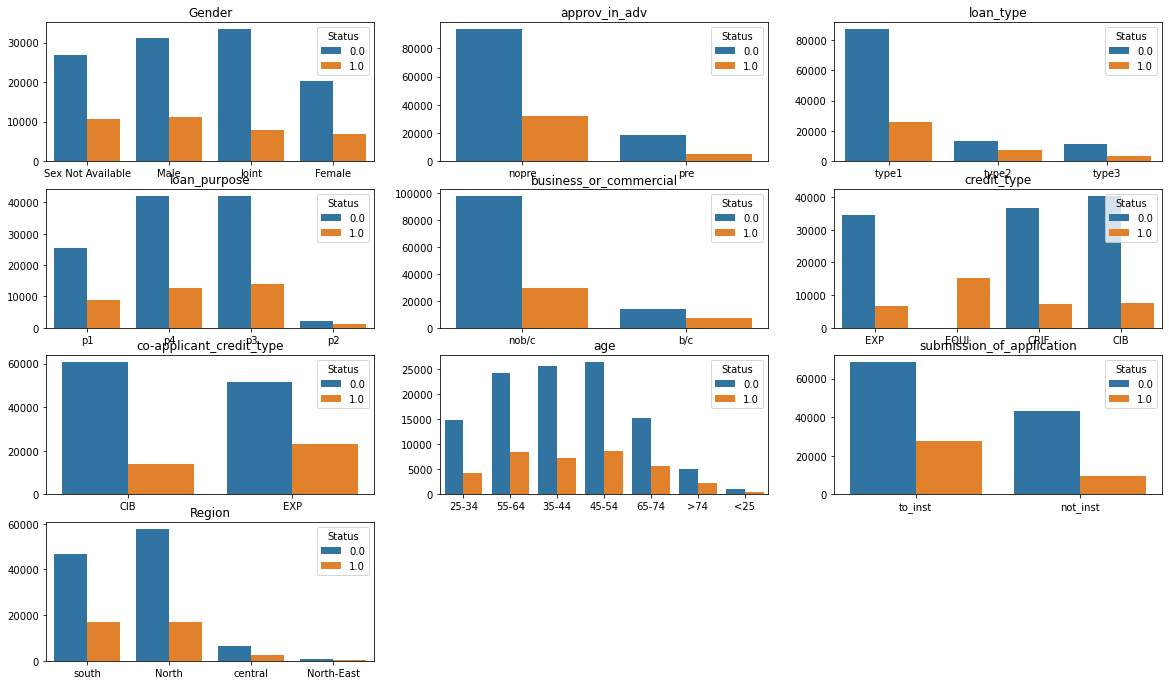

In [225]:
import itertools
plt.figure(figsize = [20,24])
df_cat=X.select_dtypes(include='object').columns
for i,j in itertools.zip_longest(df_cat,range(len(df_cat))):
    plt.subplot(8,3,j+1)
    ax = sns.countplot(df[i], hue = df["Status"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

We would drop a handful of columns and I would explain the reason for each.

Year: From EDA we can see the year does not influence the status of loan repayment and it contains a single value hence would only just act as a noise

Credit Score: This varies between customers and has zero correlation between any of the columns.

Secured by: This is the collateral backing each loan. The column is very much skewed to home and would not benefit the model

ID: obviously we would not need this in predictiong

property value: This is mostly skewed below $250K and is directly linked to security type, hence if secured by goes, it goes.

construction type: This is correlated with security type, skewed as much and contain same distribution,hence it goes too.

Occupancy Type: The type of occupancy in the property, which would again have to go as it is highly skewed and does not tell us much about the status.

total_units: This tells us the total number of units in the home. It as well is highly skewed and does not tell us much about status

lump sump payment: Most loans were not paid back in lump sum making the column highly skewed and it tells us little about status of the payment

term: This refers to the loan term. Most loan terms are for 360 days, and others may act as a noise and status is distributed across all terms so we remove it

# One hot endoing

In [227]:
y.value_counts()

0.000000    112031
1.000000     36639
Name: Status, dtype: int64

In [228]:
df_num = X.select_dtypes(include = [np.number])
df_num.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'income', 'Credit_Score', 'LTV', 'dtir1'],
      dtype='object')

In [229]:
# categorical_columns
categorical_columns = X.select_dtypes(include = [np.object])
categorical_columns.columns

Index(['Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'credit_type', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'Region'],
      dtype='object')

In [230]:
dummy_var = pd.get_dummies(data = categorical_columns, drop_first = True)
dummy_var.head()

,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,business_or_commercial_nob/c,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south
0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [231]:
X_new1 = pd.concat([df_num, dummy_var], axis=1)

In [232]:
X_new1.shape

(148670, 32)

In [233]:
y.head()

0   1.000000
1   1.000000
2   0.000000
3   0.000000
4   0.000000
Name: Status, dtype: float64

In [234]:
X_train,X_test,y_train,y_test = train_test_split(X_new1,y, random_state=42)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (111502, 32)
X_test (37168, 32)
y_train (111502,)
y_test (37168,)


In [235]:
y_train.head()

123891   0.000000
15938    0.000000
108267   0.000000
88902    0.000000
61172    0.000000
Name: Status, dtype: float64

In [236]:
y.value_counts()

0.000000    112031
1.000000     36639
Name: Status, dtype: int64

# Decission Tree

In [237]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score,recall_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [311]:
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# DT Grid Search

In [267]:
from sklearn.model_selection import GridSearchCV

tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 5),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,5),
                     'min_samples_leaf': range(1,5),
                     'max_leaf_nodes': range(1, 5)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [367]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

scores_dt_train = cross_validate(estimator = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring =scoring)

In [369]:
print('Scoring Results for Decision Tree Train :\ns')
print("fit_time :",scores_dt_train['fit_time']) 
print("score_time :" ,scores_dt_train['score_time'])   
print("accuracy :",scores_dt_train['test_accuracy'])
print("precision :",scores_dt_train['test_precision'])  
print("recall :",scores_dt_train['test_recall'])  
print("f1_score :",scores_dt_train['test_f1_score'])

Scoring Results for Decision Tree Train :
fit_time : [0.09100175 0.04882693 0.04154515 0.04039693 0.04027104]
score_time : [0.03737998 0.03396297 0.0380969  0.03083515 0.03083086]
accuracy : [0.78337294 0.77794718 0.78533632 0.78349776 0.7773991 ]
precision : [0.54108168 0.53372362 0.54369287 0.54115928 0.53239741]
recall : [0.80523256 0.79491371 0.81050145 0.80741279 0.80614099]
f1_score : [0.64724352 0.63864565 0.65081333 0.64800233 0.64127764]


In [370]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

scores_dt_test = cross_validate(estimator = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10), 
                         X = X_test, 
                         y = y_test, 
                         cv = 5, 
                         scoring =scoring)

In [371]:
print("Scoring Results for Decision Tree Test :\n")

print("fit_time :",scores_dt_test['fit_time']) 
print("score_time :" ,scores_dt_test['score_time'])   
print("accuracy :",scores_dt_test['test_accuracy'])
print("precision :",scores_dt_test['test_precision'])  
print("recall :",scores_dt_test['test_recall'])  
print("f1_score :",scores_dt_test['test_f1_score'])   


Scoring Results for Decision Tree Test :

fit_time : [0.03979492 0.02186322 0.0144968  0.01613903 0.02066588]
score_time : [0.02033615 0.01432776 0.01241016 0.01093602 0.01104689]
accuracy : [0.78921173 0.78315846 0.78598332 0.7793623  0.78407103]
precision : [0.54708684 0.53931751 0.54259598 0.53309222 0.5404003 ]
recall : [0.8185307  0.79714912 0.81359649 0.80855732 0.79978058]
f1_score : [0.65583132 0.64336283 0.65101996 0.64254577 0.64499005]


# RF Grid Search

In [277]:
tuned_paramaters = [{'criterion': ['entropy'],
                     'n_estimators': [10, 30],
                     'max_depth': [5,10],
                     'min_samples_split': [2, 5, 8],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8]}]
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} 



In [372]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

scores_rf_train = cross_validate(estimator = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = scoring)

In [373]:
print("Scoring Results for Random Forest Train :\n")

print("fit_time :",scores_rf_train['fit_time']) 
print("score_time :" ,scores_rf_train['score_time'])   
print("accuracy :",scores_rf_train['test_accuracy'])
print("precision :",scores_rf_train['test_precision'])  
print("recall :",scores_rf_train['test_recall'])  
print("f1_score :",scores_rf_train['test_f1_score'])   


Scoring Results for Random Forest Train :

fit_time : [0.2690587  0.22168922 0.21438789 0.22037792 0.22753286]
score_time : [0.04149914 0.04005098 0.03725123 0.03969407 0.03851199]
accuracy : [0.99964127 0.99946191 0.99955157 0.99964126 0.9996861 ]
precision : [1. 1. 1. 1. 1.]
recall : [0.99854651 0.99782016 0.99818314 0.99854651 0.9987282 ]
f1_score : [0.99927273 0.99890889 0.99909074 0.99927273 0.99936369]


In [337]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

scores_rf_test = cross_validate(estimator = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10), 
                         X = X_test, 
                         y = y_test, 
                         cv = 5, 
                         scoring = scoring)

In [353]:
print("Scoring Results for Random Forest Test :\n")

print("fit_time :",scores_rf_test['fit_time']) 
print("score_time :" ,scores_rf_test['score_time'])   
print("test_accuracy :",scores_rf_test['test_accuracy'])
print("test_precision :",scores_rf_test['test_precision'])  
print("test_recall :",scores_rf_test['test_recall'])  
print("test_f1_score :",scores_rf_test['test_f1_score'])  

Scoring Results for Random Forest Test :

fit_time : [0.25004578 0.23005581 0.22787213 0.22940421 0.23021483]
score_time : [0.01346016 0.01331496 0.01275182 0.01288986 0.01319718]
test_accuracy : [1.         1.         1.         1.         0.99986546]
test_precision : [1.         1.         1.         1.         0.99945175]
test_recall : [1. 1. 1. 1. 1.]
test_f1_score : [1.        1.        1.        1.        0.9997258]


# XG Boost 

In [288]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [289]:
X_train.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,income,Credit_Score,LTV,dtir1,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,business_or_commercial_nob/c,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age__25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south
123891,566500.000000,4.375000,0.553500,1676.350000,10560.000000,625.000000,57.750397,30.000000,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0
15938,266500.000000,4.375000,0.775800,5605.000000,3240.000000,567.000000,78.846154,44.000000,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
108267,446500.000000,3.625000,0.704600,0.000000,6957.338876,692.000000,73.437500,37.732932,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
88902,296500.000000,3.625000,0.550700,3073.750000,5820.000000,860.000000,64.737991,36.000000,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
61172,366500.000000,3.625000,0.152500,6470.233000,5160.000000,719.000000,58.359873,38.000000,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1


In [290]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

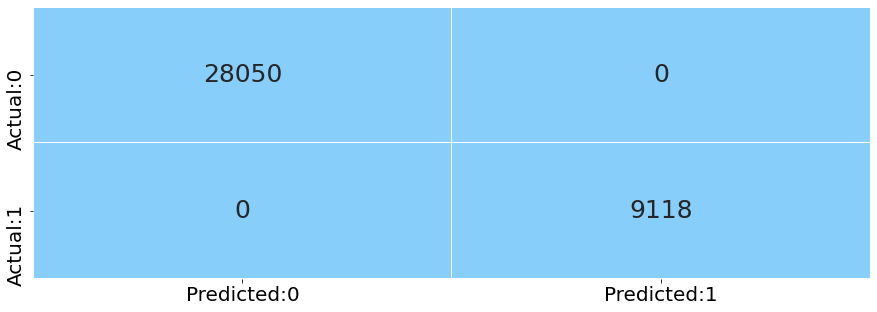

In [291]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()
    
plot_confusion_matrix(xgb_model)

In [292]:
def get_test_report(model):
    test_pred = model.predict(X_test)

    return(classification_report(y_test, test_pred))


test_report = get_test_report(xgb_model)

print(test_report)



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28050
         1.0       1.00      1.00      1.00      9118

    accuracy                           1.00     37168
   macro avg       1.00      1.00      1.00     37168
weighted avg       1.00      1.00      1.00     37168



# XG Boost with tunning

In [293]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 3} 



In [340]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))
xgb_tuned_model = xgb_grid_model.fit(X_train, y_train)



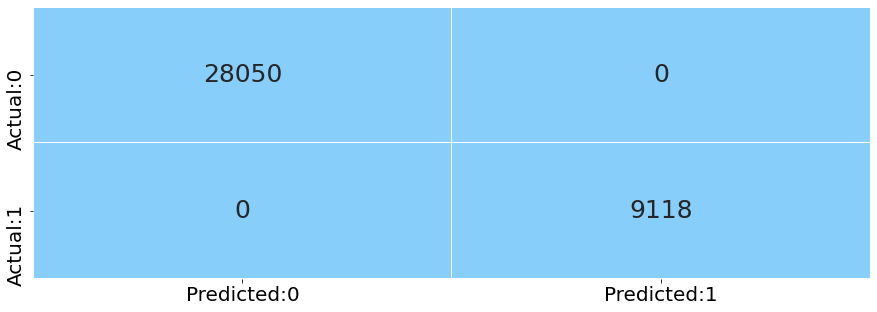

In [306]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()
    
plot_confusion_matrix(xgb_tuned_model)


In [345]:
print("** For Train **\n")
y_pred_train = xgb_tuned_model.predict(X_train)
print("Accuracy for Train:", accuracy_score(y_train, y_pred_train))
print("Precission:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("roc_auc_score:",roc_auc_score(y_train, y_pred_train))

** For Train **

Accuracy for Train: 1.0
Precission: 1.0
Recall: 1.0
roc_auc_score: 1.0


In [347]:
print("** For Test **\n")

y_pred = xgb_tuned_model.predict(X_test)
print("Accuracy for Test:", accuracy_score(y_test, y_pred))
print("Precission:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("roc_auc_score:",roc_auc_score(y_test, y_pred))

** For Test **

Accuracy for Test: 1.0
Precission: 1.0
Recall: 1.0
roc_auc_score: 1.0


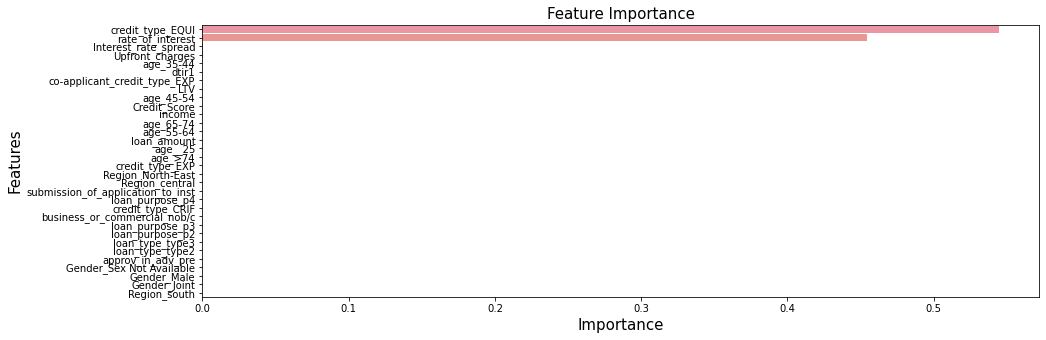

In [296]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

# Summarizing All models

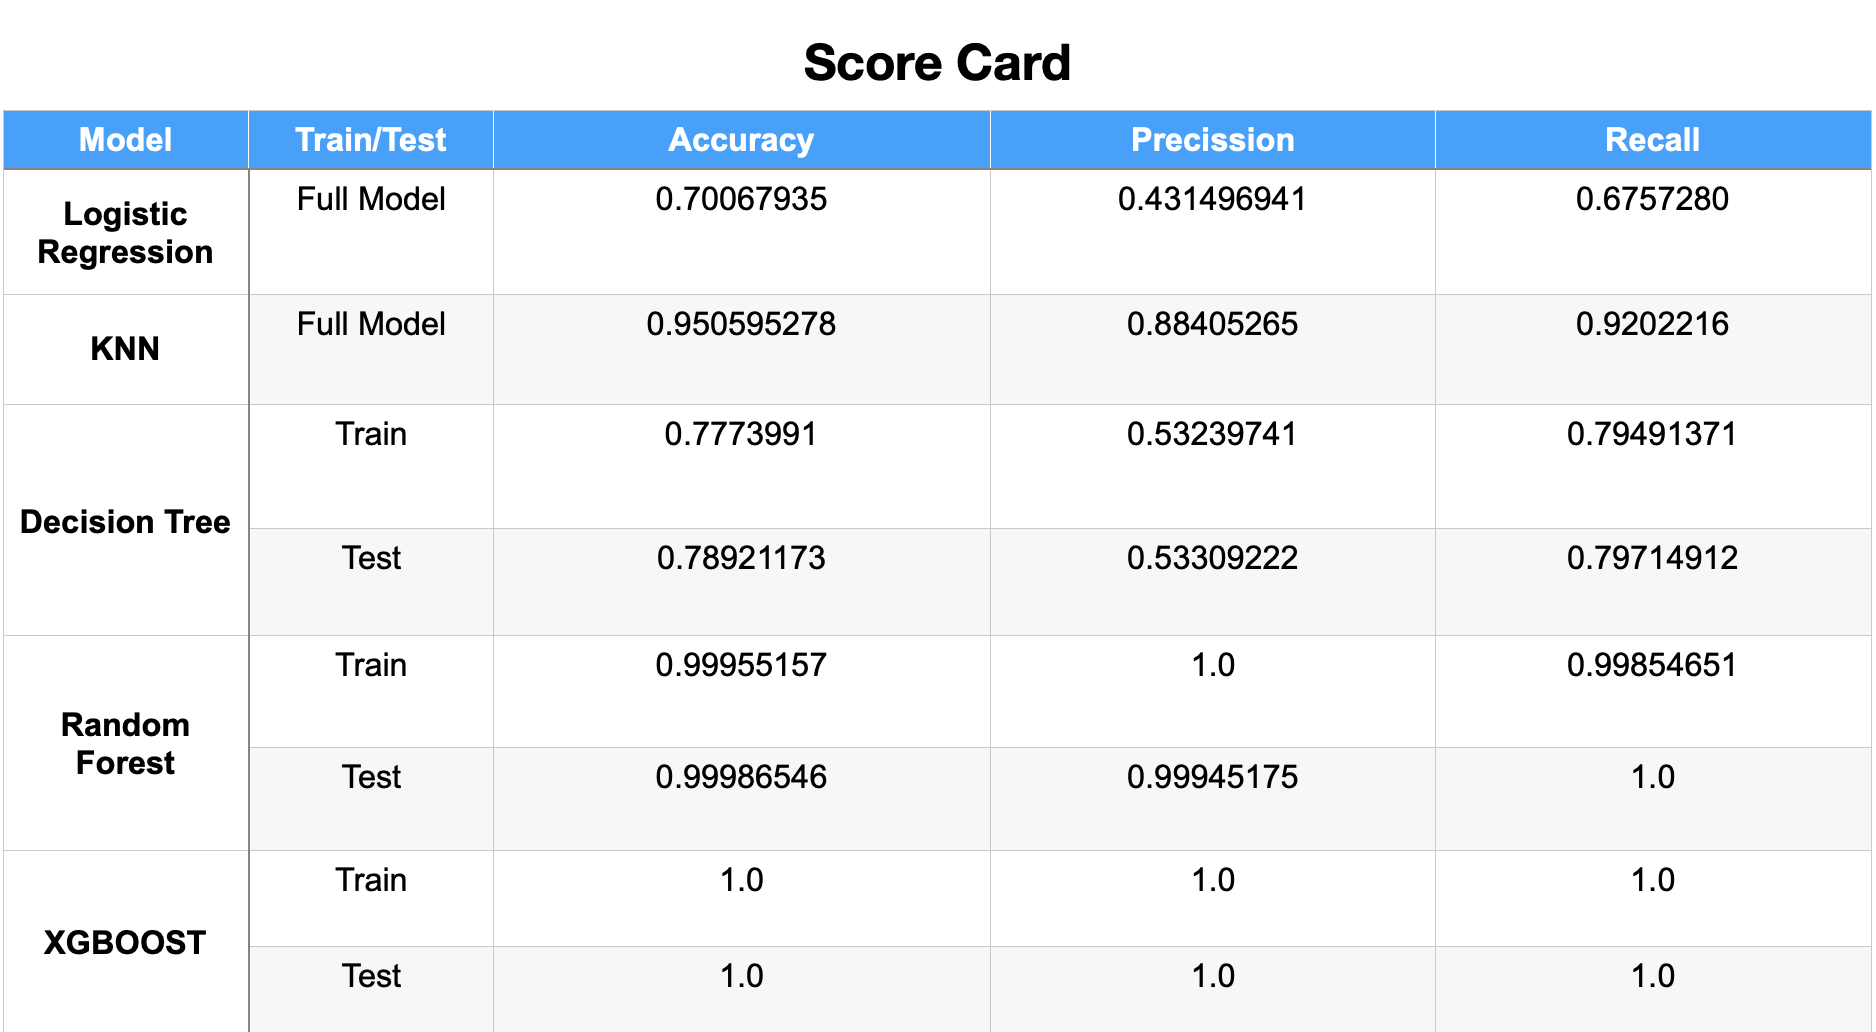





**•	From the given dataset, we have pre-processed the data to draw key insights to analyse how the loan is approved based on the data provided.**

**•	With the available key information, we have processed the data to build several Machine Learning models which learns to classify approval of loan for each customer based on the available information.**

**•	Since the response variable is to classify whether Approved / Not Approved, we have used Supervised Learning Classification to build models which is used to classify records based on the 
available data.**


**•	Upon building multiple SLC models, we chose Random Forest Classifier as our best fit 
model and then we boosted our model with xg boosting so it can predicts 99% accurately.**